In [1]:
import pandas as pd
#load the survey dataset
df = pd.read_csv('Topic_Survey_Assignment.csv')


In [2]:
import os
print(os.getcwd())

/drive


In [3]:
import matplotlib.pyplot as plt

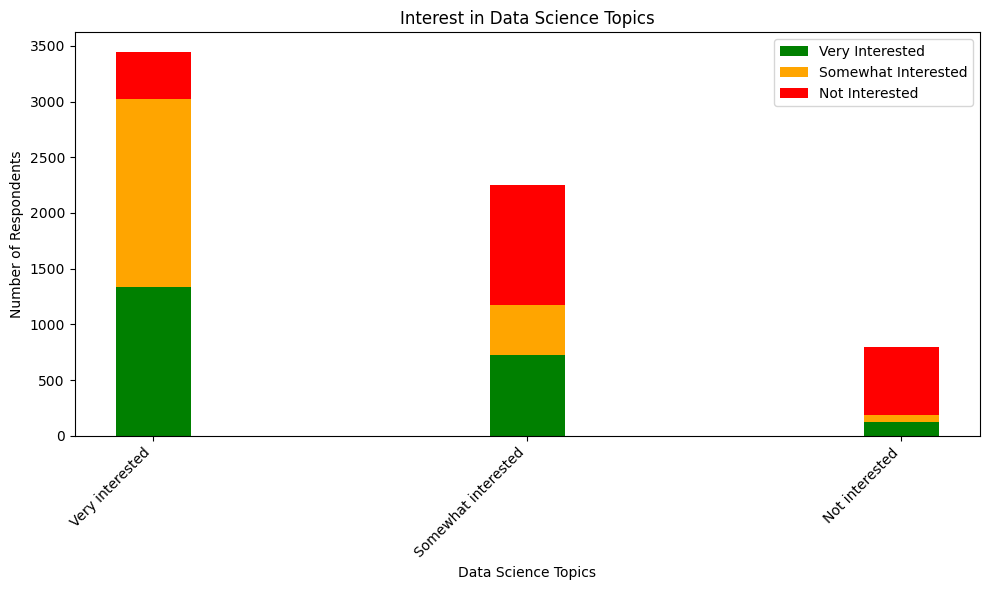

In [4]:
#'df' represent our DataFrame with the survey data
plt.figure(figsize=(10, 6))

topics = df.columns[1:]
very_interested = df.iloc[0, 1:]
somewhat_interested = df.iloc[1, 1:]
not_interested = df.iloc[2, 1:]
not_interested = df.iloc[2, 1:]

x = range(len(topics))
#Create Grouped Bar Chart

plt.bar(x, very_interested, width=0.2, label='Very Interested', color='green')
plt.bar(x, somewhat_interested, width=0.2, label='Somewhat Interested', color='orange', bottom=very_interested)
plt.bar(x, not_interested, width=0.2, label='Not Interested', color='red', bottom=very_interested + somewhat_interested)

# Labes Titles and Legends
plt.xlabel('Data Science Topics')
plt.ylabel('Number of Respondents')
plt.title('Interest in Data Science Topics')
plt.xticks(x, topics, rotation=45, ha="right")  # Set the x-axis labels to the data science topics
plt.legend()

plt.tight_layout()
plt.show()

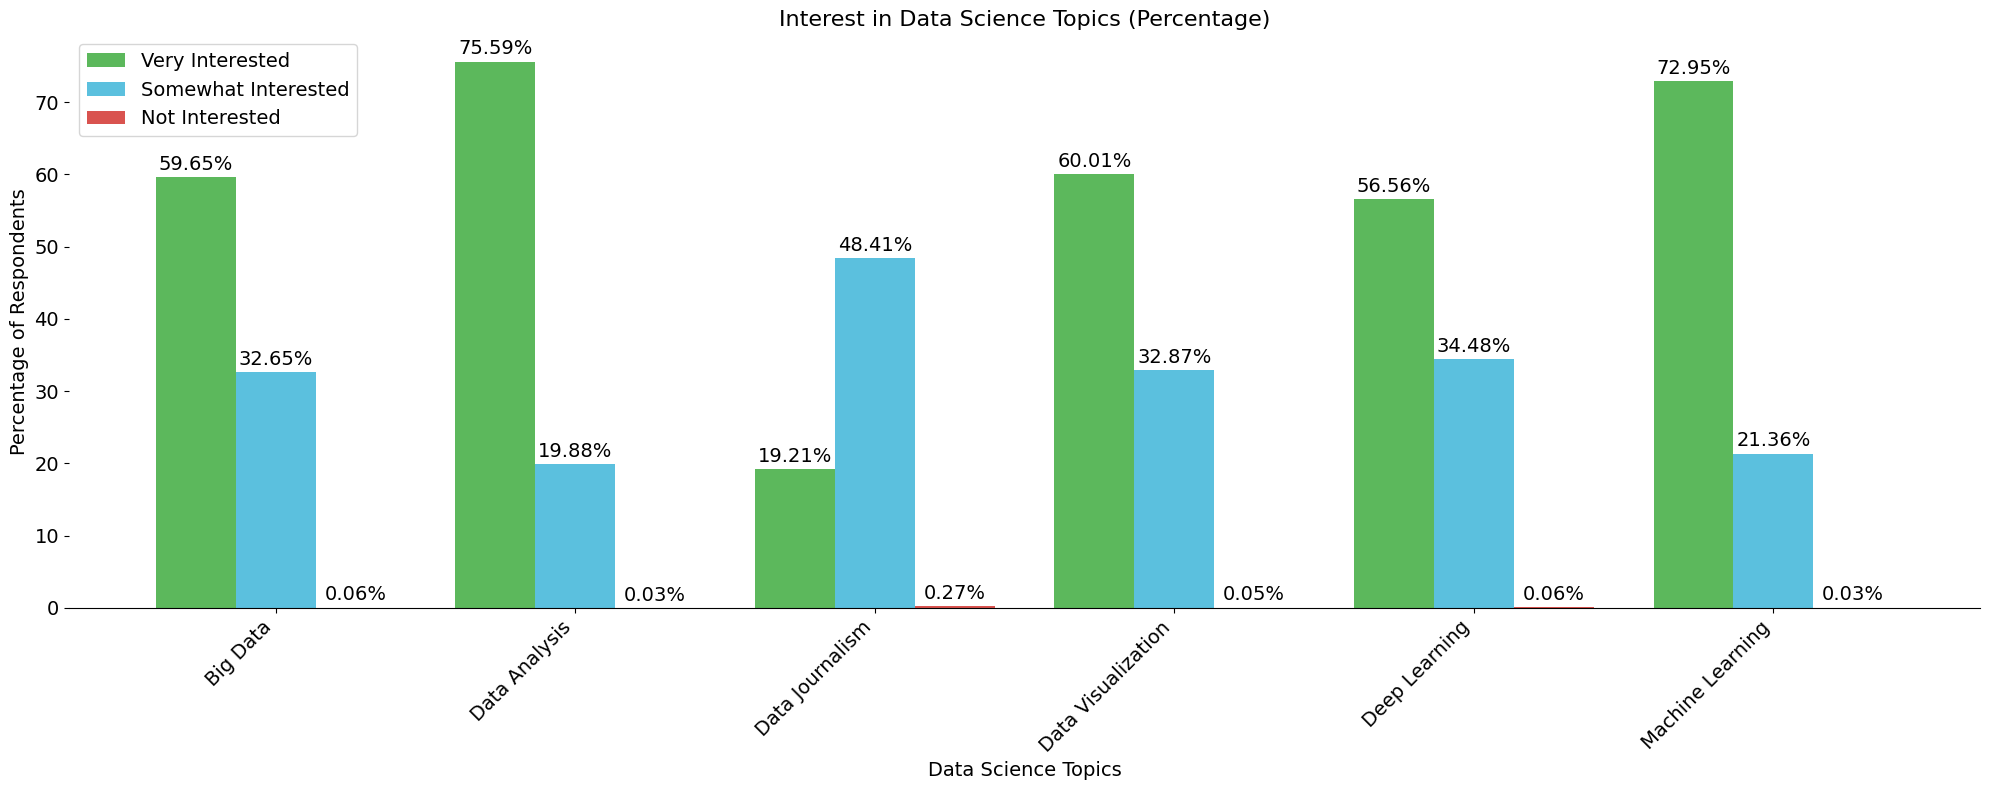

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for DSA  topics interest
total_respondents = 2233  # Total number of respondents
topics = ["Big Data", "Data Analysis", "Data Journalism", "Data Visualization", "Deep Learning", "Machine Learning"]
very_interested = [1332, 1688, 429, 1340, 1263, 1629]
somewhat_interested = [729, 444, 1081, 734, 770, 477]
not_interested = [127, 60, 610, 102, 136, 74]

#Calculate percentages 
very_interested_percent = np.array(very_interested) / total_respondents * 100
somewhat_interested_percent = np.array(somewhat_interested) / total_respondents * 100
not_interested_percent = np.array(not_interested) / total_respondents * 1



# Grouped bar chart created with % visualization
x = np.arange(len(topics))
width = 0.8 #With reference to the assignment request
colors = ['#5cb85c', '#5bc0de', '#d9534f']  # Defined as Very Interested, Somewhat Interested, Not Interested respectively

plt.figure(figsize=(20, 8))  # Increase figure size
plt.bar(x - width/3, very_interested_percent, width/3, label='Very Interested', color=colors[0])
plt.bar(x, somewhat_interested_percent, width/3, label='Somewhat Interested', color=colors[1])
plt.bar(x + width/3, not_interested_percent, width/3, label='Not Interested', color=colors[2])

# Labels, title, and legend
plt.xlabel('Data Science Topics', fontsize=14)
plt.ylabel('Percentage of Respondents', fontsize=14)
plt.title('Interest in Data Science Topics (Percentage)', fontsize=16)
plt.xticks(x, topics, rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Percentage values showing above the bars as per request
for i in x:
    plt.text(i - width/3, very_interested_percent[i] + 1, f"{very_interested_percent[i]:.2f}%", ha='center', fontsize=14)
    plt.text(i, somewhat_interested_percent[i] + 1, f"{somewhat_interested_percent[i]:.2f}%", ha='center', fontsize=14)
    plt.text(i + width/3, not_interested_percent[i] + 1, f"{not_interested_percent[i]:.2f}%", ha='center', fontsize=14)
    
# Remove left, top, and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Part 2: Supervised learning using a tree-based model

# 2.1 Import and explore the insurance claim data

In [6]:

import pandas as pd

#Load and inspect data
data = pd.read_csv('ClaimsData.csv', sep=",")

#Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Claim      1500 non-null   float64
 1   Category   1500 non-null   object 
 2   Mileage    1500 non-null   float64
 3   AgeP       1500 non-null   int64  
 4   ModelYear  1500 non-null   int64  
 5   PreOwned   1500 non-null   object 
 6   ServHist   1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 64.5+ KB
None


In [7]:
data.shape


(1500, 7)

In [8]:
data.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


# 2.3 Plot the data

In [9]:
print(data.columns)

Index(['Claim', 'Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned',
       'ServHist'],
      dtype='object')


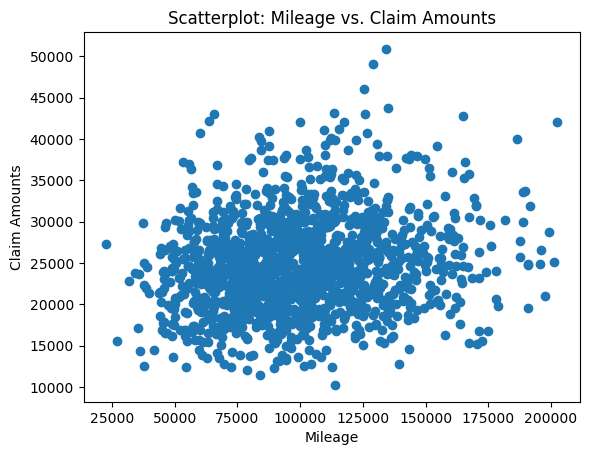

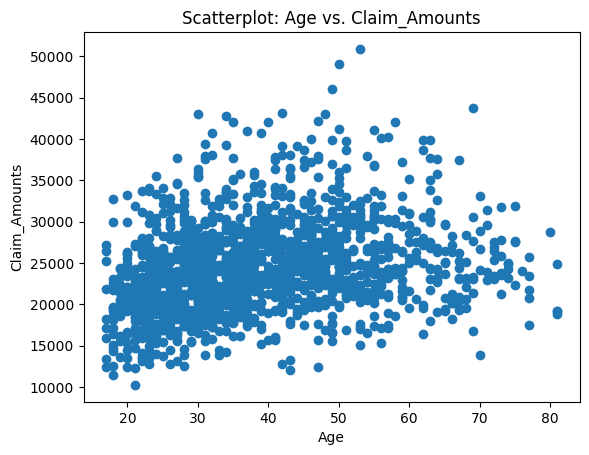

In [10]:
#Define varieable Claim_Amount and Assign Claim
data['Claim_Amounts'] = data['Claim']
data['Age'] = data['AgeP']
data['Vehicle_Type'] = data['Category']
#data['Pre_Owned'] = data['PreOwned']

#Perform explanatory data analysis to gain insights into the data. This will be displayed in scatterplots


import matplotlib.pyplot as plt
#First Scatterplot shows Milleage vs Claim Amount
plt.scatter(data['Mileage'], data['Claim_Amounts'])
plt.xlabel('Mileage')
plt.ylabel('Claim Amounts')
plt.title('Scatterplot: Mileage vs. Claim Amounts')
plt.show()

#Second Scatterplot shows Age vs. Claim Amount
plt.scatter(data['Age'], data['Claim_Amounts'])
plt.xlabel('Age')
plt.ylabel('Claim_Amounts')
plt.title('Scatterplot: Age vs. Claim_Amounts')
plt.show()



## Interpretation of Scatterplot 1 (Mileage vs. Claim Amount):

Scatterplot 1 examines the association between a vehicle's mileage and the corresponding insurance claim amount. The primary objective is to discern any potential correlation between these variables. An observation drawn from this plot suggests that vehicles with higher accumulated mileage may exhibit a propensity for larger insurance claim amounts. This trend intimates that older vehicles, characterized by higher mileage, might incur more substantial expenses in claims. The interpretation implies a direct relationship between mileage and claim cost, implying that the former can be indicative of the latter.

## *Interpretation of Scatterplot 2 (Age vs. Claim Amount):

Scatterplot 2 delves into the connection between the age of insured drivers and the magnitude of their insurance claims. The central aim is to uncover whether there exists a discernible relationship between age demographics and the extent of claims made. Analysis of this plot may disclose whether younger or older drivers are prone to filing claims of larger financial magnitude. This investigation aims to reveal potential patterns or trends in claim amounts concerning the age of insured individuals. Such insights could provide valuable information for insurance risk assessment.



In [11]:
import pandas as pd

# Group the data by 'Vehicle_Type' and calculate the mean claim amount
mean_claim_by_vehicle_type = data.groupby('Vehicle_Type')['Claim_Amounts'].mean()


# Display the mean claim amounts for each group
print(mean_claim_by_vehicle_type)




Vehicle_Type
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim_Amounts, dtype: float64


In [12]:
# Group the DataFrame by the 'PreOwned' column and calculate the mean claim amount
mean_claim_by_preowned = data.groupby('PreOwned')['Claim_Amounts'].mean()

# Print the mean claim amounts for each group
print(mean_claim_by_preowned)

PreOwned
No     23435.093700
Yes    26987.035106
Name: Claim_Amounts, dtype: float64


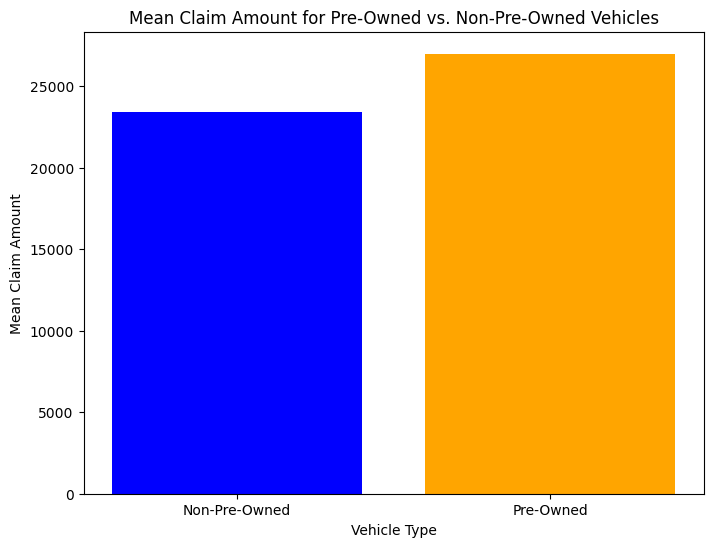

In [13]:
import matplotlib.pyplot as plt

preowned = data[data['PreOwned'] == 'Yes']['Claim_Amounts'].mean()
not_preowned = data[data['PreOwned'] == 'No']['Claim_Amounts'].mean()

# Data
vehicle_types = ['Non-Pre-Owned', 'Pre-Owned']
mean_claims = [not_preowned, preowned]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(vehicle_types, mean_claims, color=['blue', 'orange'])
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Claim Amount')
plt.title('Mean Claim Amount for Pre-Owned vs. Non-Pre-Owned Vehicles')
plt.show()


In [14]:
# Group the DataFrame by the 'ServHist' column and calculate the mean claim amount
mean_claim_by_service_history = data.groupby('ServHist')['Claim_Amounts'].mean()

# Print the mean claim amounts for each group
print(mean_claim_by_service_history)


ServHist
No     24368.474882
Yes    24780.543485
Name: Claim_Amounts, dtype: float64


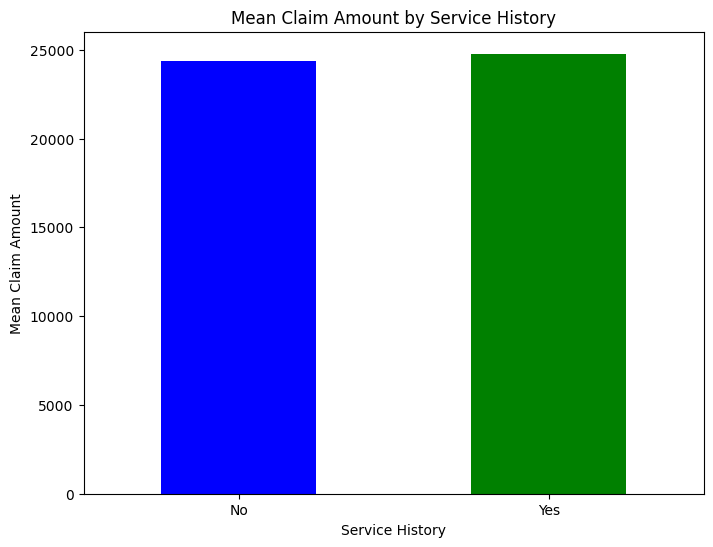

In [15]:
import matplotlib.pyplot as plt

# Calculate the mean claim amount for vehicles with and without service histories
mean_claim_by_service_history = data.groupby('ServHist')['Claim_Amounts'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
mean_claim_by_service_history.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Claim Amount by Service History')
plt.xlabel('Service History')
plt.ylabel('Mean Claim Amount')
plt.xticks(rotation=0)
plt.show()

Below the mean claim amounts for vehicles were calculated showing data with and without service history using **groupby()** function and storing it in the **mean_claim_by_service_history** varieble. 

In [16]:
# Group the DataFrame by the 'ModelYear' column and calculate the mean claim amount
mean_claim_by_model_year = data.groupby('ModelYear')['Claim_Amounts'].mean()

# Print the mean claim amounts for each model year
print(mean_claim_by_model_year)


ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim_Amounts, dtype: float64


# 2.4 Prepare the data

In [17]:
print(data.isnull().sum())

Claim            0
Category         0
Mileage          0
AgeP             0
ModelYear        0
PreOwned         0
ServHist         0
Claim_Amounts    0
Age              0
Vehicle_Type     0
dtype: int64


The above outputs shows that there are no missing values in any of the column in the DataFrame. This is actually a good indication as the dataset is complete and does not have any missing data.

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# The Column name to be worked on is 'Vehicle type'
ohe = OneHotEncoder(sparse_output=False)
Xd = ohe.fit_transform(data['Vehicle_Type'].values.reshape(-1, 1))

# Create new column names for the one-hot encoded columns
column_names = ['Vehicle_Type' + str(int(i)) for i in range(Xd.shape[1])]

# Create a DataFrame with the one-hot encoded columns
data_encoded = pd.DataFrame(Xd, columns=column_names)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Now, Data contains the original data with one-hot encoded "Vehicle" columns added


In [19]:
print(data.columns)

Index(['Claim', 'Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned',
       'ServHist', 'Claim_Amounts', 'Age', 'Vehicle_Type', 'Vehicle_Type0',
       'Vehicle_Type1', 'Vehicle_Type2', 'Vehicle_Type3', 'Vehicle_Type4'],
      dtype='object')


In [20]:
# Selecting the desired features
selected_features = data.loc[:, ['Mileage', 'AgeP', 'Vehicle_Type0', 'Vehicle_Type1', 'Vehicle_Type2', 'Vehicle_Type3', 'Vehicle_Type4']]

# Checking the first few rows of the selected features
print(selected_features.head())


    Mileage  AgeP  Vehicle_Type0  Vehicle_Type1  Vehicle_Type2  Vehicle_Type3  \
0   99754.4    40            0.0            0.0            1.0            0.0   
1   63926.9    43            1.0            0.0            0.0            0.0   
2  134829.8    28            0.0            0.0            0.0            1.0   
3   59107.4    28            0.0            0.0            0.0            1.0   
4  132746.9    22            1.0            0.0            0.0            0.0   

   Vehicle_Type4  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [21]:
# 'Claim_Amounts' have been separated from the features
X = selected_features  # Our selected feartures is maintained here
y = data['Claim_Amounts']  #  'Claim_Amounts' 

# Print the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1500, 7)
Shape of y: (1500,)


In [22]:
X.head()


,Mileage,AgeP,Vehicle_Type0,Vehicle_Type1,Vehicle_Type2,Vehicle_Type3,Vehicle_Type4
0,99754.4,40,0.0,0.0,1.0,0.0,0.0
1,63926.9,43,1.0,0.0,0.0,0.0,0.0
2,134829.8,28,0.0,0.0,0.0,1.0,0.0
3,59107.4,28,0.0,0.0,0.0,1.0,0.0
4,132746.9,22,1.0,0.0,0.0,0.0,0.0


In [23]:
y.head()

0    42089.53
1    24097.69
2    19190.63
3    20574.27
4    26734.33
Name: Claim_Amounts, dtype: float64

# 2.5 Split the data into a training and test set

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print the shapes of the training and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

from sklearn.tree import DecisionTreeRegressor

# Creation of a  DecisionTreeRegressor model with max_depth=4
model = DecisionTreeRegressor(max_depth=4, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)


Shape of X_train: (1050, 7)
Shape of y_train: (1050,)
Shape of X_test: (450, 7)
Shape of y_test: (450,)


DecisionTreeRegressor(max_depth=4, random_state=0)

In [25]:
from sklearn.metrics import mean_squared_error

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate the MSE for the training set
error = mean_squared_error(y_train, y_pred_train)

# Print the MSE
print("MSE before pruning:", error)



MSE before pruning: 23113570.613739405


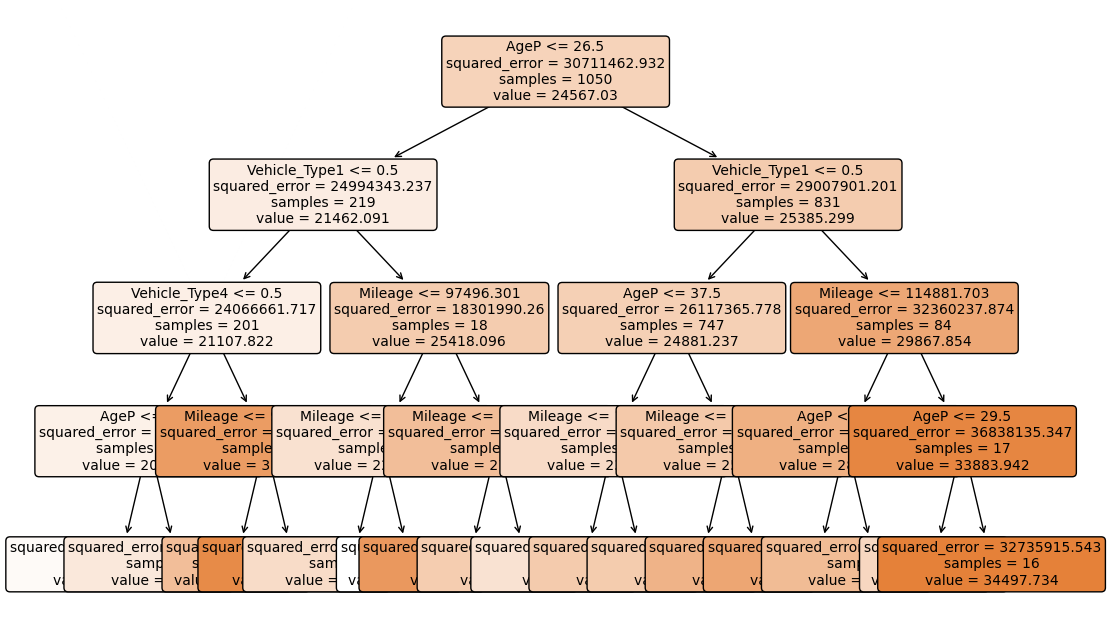

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the unpruned tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()


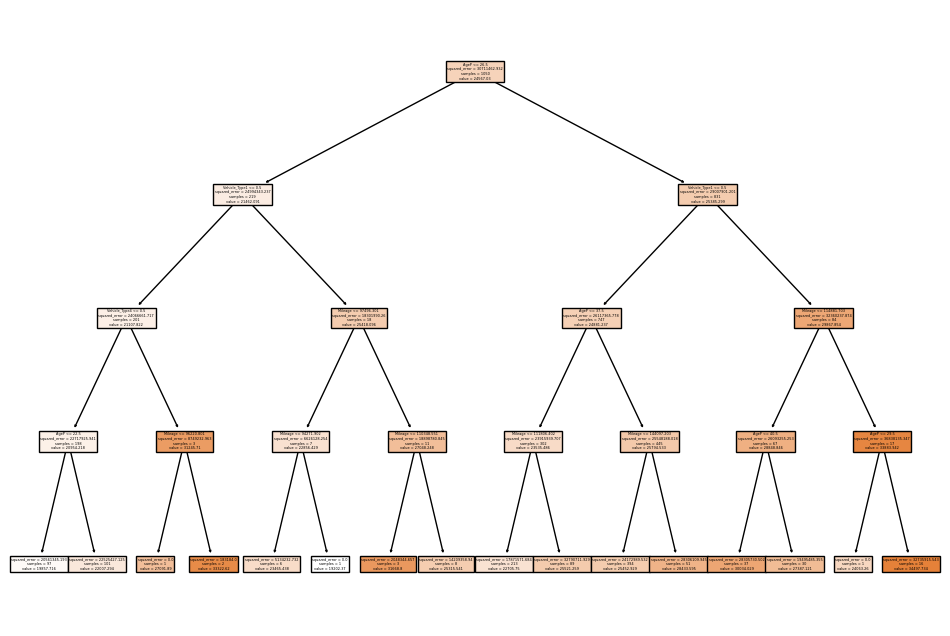

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

In [28]:
print("Tree depth =", model.get_depth(), '\n'
      "Number of leaves =", model.get_n_leaves())

Tree depth = 4 
Number of leaves = 16


In [29]:
#Finding the optimal nummber of lead nodes for our decision tree usinf the grid search over a range of possible values
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
nodes = [node for node in range(2,35)]     

# Define a range of maximum leaf nodes values to search over
param_grid = {'max_leaf_nodes': range(2, 35)}

# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Getting  the best parameter value
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

print("Optimal number of leaf nodes:", best_max_leaf_nodes)


Optimal number of leaf nodes: 21


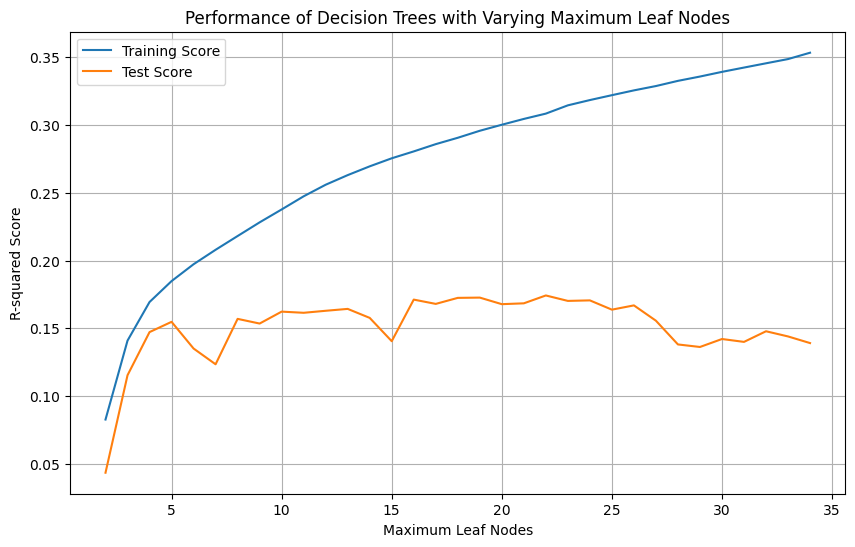

In [30]:
# Visualise the validation score in relation to maximum leaf nodes
import matplotlib.pyplot as plt

# Define a list of maximum leaf nodes values to explore
nodes = range(2, 35)

# Create an empty list to store the models
regs = []

# Fit DecisionTreeRegressor models with different maximum leaf nodes values
for node in nodes:
    reg = DecisionTreeRegressor(random_state=0, max_leaf_nodes=node)
    reg.fit(X_train, y_train)
    regs.append(reg)

# Calculate the training and test scores for each model
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

# Create a plot to visualize the scores
plt.figure(figsize=(10, 6))
plt.plot(nodes, train_scores, label='Training Score')
plt.plot(nodes, test_scores, label='Test Score')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('R-squared Score')
plt.title('Performance of Decision Trees with Varying Maximum Leaf Nodes')
plt.legend()
plt.grid(True)
plt.show()


#The chart above shows the training and test scores for decision Trees with different maximum leaf nodes values. You can observe how the model's performance changes as you vary the maximum leaf nodes, with this it helps
#the data analyst choose and intepret appropriate values for specific problems. 

In [36]:
from sklearn.model_selection import cross_val_score

# Define a list to store validation scores
validation_scores = []

# To find the optimal maximum leaf nodes, cross-validation is applied
for node in nodes:
    reg3 = DecisionTreeRegressor(random_state=0, max_leaf_nodes=node)
    score = cross_val_score(estimator=reg3, X=X_train, y=y_train, cv=5)
    
    # Append the mean score to the validation_scores list
    validation_scores.append(score.mean())

# Now, you can proceed to find the maximum validation score and the corresponding maximum leaf nodes as you did before
max_score_index = validation_scores.index(max(validation_scores))
nodes_optimum = nodes[max_score_index]

print("Optimal Maximum Leaf Nodes:", nodes_optimum)


Optimal Maximum Leaf Nodes: 21


In [37]:
# Using the optimum maximum leaf nodes to fit a parsimonious tree 
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor with the optimal maximum leaf nodes and random_state=0
reg_parsimonious = DecisionTreeRegressor(max_leaf_nodes=nodes_optimum, random_state=0)

# Fit the model to the training data
reg_parsimonious.fit(X_train, y_train)


DecisionTreeRegressor(max_leaf_nodes=21, random_state=0)

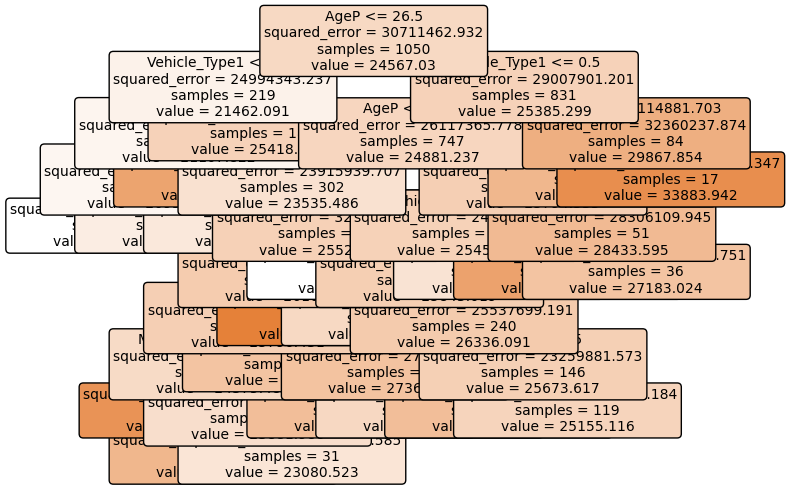

In [38]:
# Visualising the smaller pruned tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(reg_parsimonious, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()


#The above pruned tree shows a lmited depth, making it easir to visualize and interprest. 

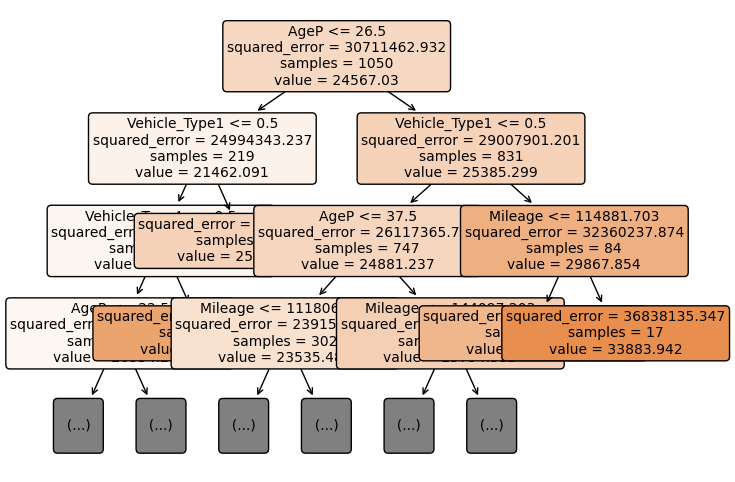

In [39]:
# Show the first few levels of the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(reg_parsimonious, filled=True, feature_names=X.columns, rounded=True, fontsize=10, max_depth=3)
plt.show()


#With the max depth of 3 only, the tree plotted above limits to the first three levels of the decision tree. Starts with Agep <=26.5 and split ito vehicle types and mileage to the lower level.

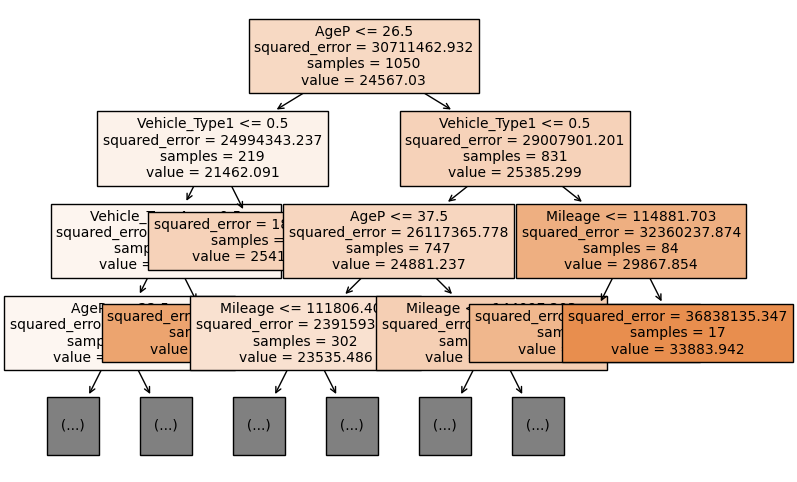

In [51]:
#Save the plot as image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the smaller pruned tree (replace 'reg' with your variable name)
plt.figure(figsize=(9, 6))  # Adjust the figure size as needed
plot_tree(reg_parsimonious, filled=True, feature_names=X.columns, max_depth=3,fontsize=10)  # Adjust max_depth as needed
plt.savefig('ClaimsDataSet_tree.png')  # Save the plot as an image file
plt.show()



In [45]:
# Final test to see how the model performs: 
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred_test = reg_parsimonious.predict(X_test)

# Calculate the MSE for the test set
error2 = mean_squared_error(y_test, y_pred_test)

# Print the MSE
print("MSE after pruning:", error2)

# Assign the MSE to the variable name "error2"


MSE after pruning: 28154276.260553047


In [46]:
# What is the final model to be used for predictions in future? 
from sklearn.tree import DecisionTreeRegressor

# Create the final DecisionTreeRegressor model with the optimal maximum leaf nodes and random_state=0
final_model = DecisionTreeRegressor(max_leaf_nodes=21, random_state=0)

# Fit the final model to the training data
final_model.fit(X_train, y_train)


DecisionTreeRegressor(max_leaf_nodes=21, random_state=0)

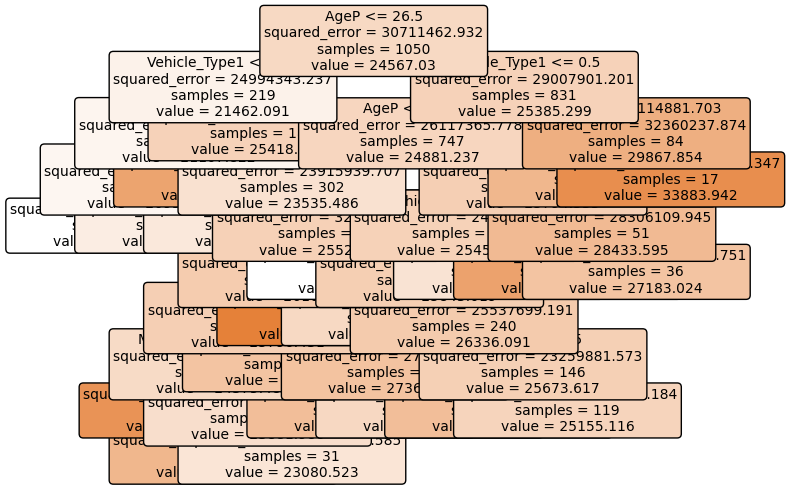

In [47]:
# Visualising the smaller pruned tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(reg_parsimonious, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

#Nothing seems to have changed above.

#Insight Questions from a Fitted Tree-Based Model

# A tree based is demeed approprite than the neural network in this scenario because of it is iterpretability; Decision tree are highly interpretable models. they provide a clear and intuitive understanding of how the input features
# are used to make predictions. They Feature Importance; Decision trees are simple can easily qunatify feature importance, helping to identify which features are most influential in making predictions. Transparancy; IIn this case,
#tranparancy and regulatiry is a must in compliance of such crucial data like insurance claims. It makes it easier to explain and justify decisions made by decision tree model to stakeholders and regulatiry bodies. 

#Reference.https://medium.com/geekculture/why-tree-based-models-beat-deep-learning-on-tabular-data-fcad692b1456

#To gain insights into the factors that affect the claim amount, we can analyze the decision tree and interpret its nodes.
#We'll start by looking at the first split of the decision tree, followed by two more nodes:


# 1. First Split (Node 0)
# The first split in the decision tree is based on the "AgeP" variable, which represents the age of the driver.
# Recommendation: Based on the tree's first split, the model suggests that the age of the driver is a significant factor in predicting insurance claim amounts. 
#In particular, drivers with an age less than or equal to 26.5 years are directed to the left branch, while those older than 26.5 years are directed to the right branch.
#**Course of Action:** Insurance companies may consider segmenting their policies or premium rates based on driver age. They might offer different policies or rates for drivers under 30 and those 30 or older.
#This approach acknowledges that younger drivers may pose a higher risk, potentially resulting in higher claim amounts.

# 2. Second Node (Node 2):
#Node 2 represents a split within the left branch (drivers aged 26.5 years or less) based on the "Vehicle Types" variable.
#Impact on Premiums: This node suggests that the type of vehicle  driven by younger drivers plays a role in determining claim amounts. If Vehicle Types is less than or equal to 1.5, the predicted claim amount is relatively lower, 
#while a Category2 greater than 1.5 leads to a higher predicted claim amount.
#**Course of Action:** Insurance companies may consider offering lower premiums for drivers aged 26.5 or less if they drive vehicles classified as Category2 <= 1.5. 
#Conversely, drivers in this age group who drive vehicles classified as Category2 > 1.5 may be charged higher premiums.

# 3. Third Node (Node6)
#Node 6 represents a split within the right branch (drivers older than 26.5 years) based on the "Mileage" variable.
#Impact on Premiums: This node indicates that for drivers aged over 26.5 years, the mileage driven annually significantly affects claim amounts. 
#If the annual mileage is less than or equal to 6978.5, the predicted claim amount is lower, while a mileage greater than 6978.5 leads to a higher predicted claim amount.
#**Course of Action** Insurance companies may offer lower premiums to drivers over 26.5 years if their annual mileage is below the threshold of 6978.5 miles. 
#This approach acknowledges that drivers with lower mileage may have a lower risk of accidents and claims.






